In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from math import sqrt
import statistics
from scipy import stats

#
import matplotlib as mpl
import csv

#
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
%matplotlib inline
color = sns.color_palette()
import re
from numpy import percentile
#sklearn modules for Model Selection:


In [2]:
df = pd.read_csv("BankChurners.csv") 


In [3]:
path = "BankChurners.csv"
#Ищем все Unknown параметры
df = pd.read_csv(path, na_values = "Unknown")
numeric_data = ["CLIENTNUM","Customer_Age","Months_on_book","Credit_Limit","Total_Revolving_Bal","Contacts_Count_12_mon",
                     "Avg_Open_To_Buy","Total_Amt_Chng_Q4_Q1","Total_Trans_Amt","Total_Trans_Ct","Total_Ct_Chng_Q4_Q1","Avg_Utilization_Ratio",
                     "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1",
                     "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"]

In [4]:
#Находим количество null в каждом из столбцов
df.isnull().sum()

CLIENTNUM                                                                                                                                0
Attrition_Flag                                                                                                                           0
Customer_Age                                                                                                                             0
Gender                                                                                                                                   0
Dependent_count                                                                                                                          0
Education_Level                                                                                                                       1519
Marital_Status                                                                                                                         749
Income_Category            

In [5]:
marital_status = df['Marital_Status'].value_counts().to_list()
marital_probability = []
marital_sum = sum(marital_status)
for i in marital_status:
    marital_probability.append(i/marital_sum)
    
education_level = df['Education_Level'].value_counts().to_list()
education_probability = []
education_sum = sum(education_level)
for i in education_level:
    education_probability.append(i/education_sum)
    
income_category = df['Income_Category'].value_counts().to_list()
income_probability = []
income_sum = sum(income_category)
for i in income_category:
    income_probability.append(i/income_sum)

In [6]:
status = ['Married','Single','Divorced']
school = ['Graduate','High School','Uneducated','College','Post-Graduate','Doctorate']
money  = ['Less than $40K','$40K - $60K','$80K - $120K','$60K - $80K','$120K +']

for i,num in enumerate(df['Education_Level']):
    if type(num) == float :
        arr = np.random.choice(school,1, p=[education_probability[0], education_probability[1],education_probability[2],education_probability[3], education_probability[4],education_probability[5]])
        cell = ''.join(arr)
        df.at[i, 'Education_Level'] = cell
        
for i,num in enumerate(df['Marital_Status']):
    if type(num) == float :
        arr = np.random.choice(status, 1, p=[marital_probability[0],marital_probability[1],marital_probability[2]])
        cell = ''.join(arr)
        df.at[i, 'Marital_Status'] = cell
        
for i,num in enumerate(df['Income_Category']):
    if type(num) == float :
        arr = np.random.choice(money, 1, p=[income_probability[0], income_probability[1],income_probability[2],income_probability[3],income_probability[4]])
        cell = ''.join(arr)
        df.at[i, 'Income_Category'] = cell

In [7]:
##Значение null убрались
df.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [8]:
#conversions
names = list(df.columns)
attrition_dict = {'Existing Customer' : 1,'Attrited Customer': 0}
gender_dict = {'M' : 1,'F' : 0}
education_dict = {'Uneducated' : 0,'Graduate' : 1 ,'High School' : 2,'College' : 3,'Post-Graduate' : 4,'Doctorate' : 5}
marital_dict = {'Married' : 1, 'Single' : 0, 'Divorced' : 2}
card_dict = {'Blue' : 0, 'Silver' : 1, 'Gold' : 2, 'Platinum' : 3}

for i,num in enumerate(df['Attrition_Flag']):
    df.at[i, 'Attrition_Flag'] = attrition_dict[num]

for i,num in enumerate(df['Gender']):
    df.at[i, 'Gender'] = gender_dict[num] 
    
for i,num in enumerate(df['Marital_Status']):
    df.at[i, 'Marital_Status'] = marital_dict[num]     

for i,num in enumerate(df['Education_Level']):
    df.at[i, 'Education_Level'] = education_dict[num]

for i,num in enumerate(df['Income_Category']):
    number_list = re.findall(r"\d+",num)
    df.at[i, 'Income_Category'] = int(max(number_list))*1000 
    
for i,num in enumerate(df['Card_Category']):
    df.at[i, 'Card_Category'] = card_dict[num]

for i in names:
    pd.to_numeric(df[i], errors ='coerce')

In [9]:
#Проверка
df.head

<bound method NDFrame.head of        CLIENTNUM Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383              1            45      1                3   
1      818770008              1            49      0                5   
2      713982108              1            51      1                3   
3      769911858              1            40      0                4   
4      709106358              1            40      1                3   
...          ...            ...           ...    ...              ...   
10122  772366833              1            50      1                2   
10123  710638233              0            41      1                2   
10124  716506083              0            44      0                1   
10125  717406983              0            30      1                2   
10126  714337233              0            43      0                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0                   2  

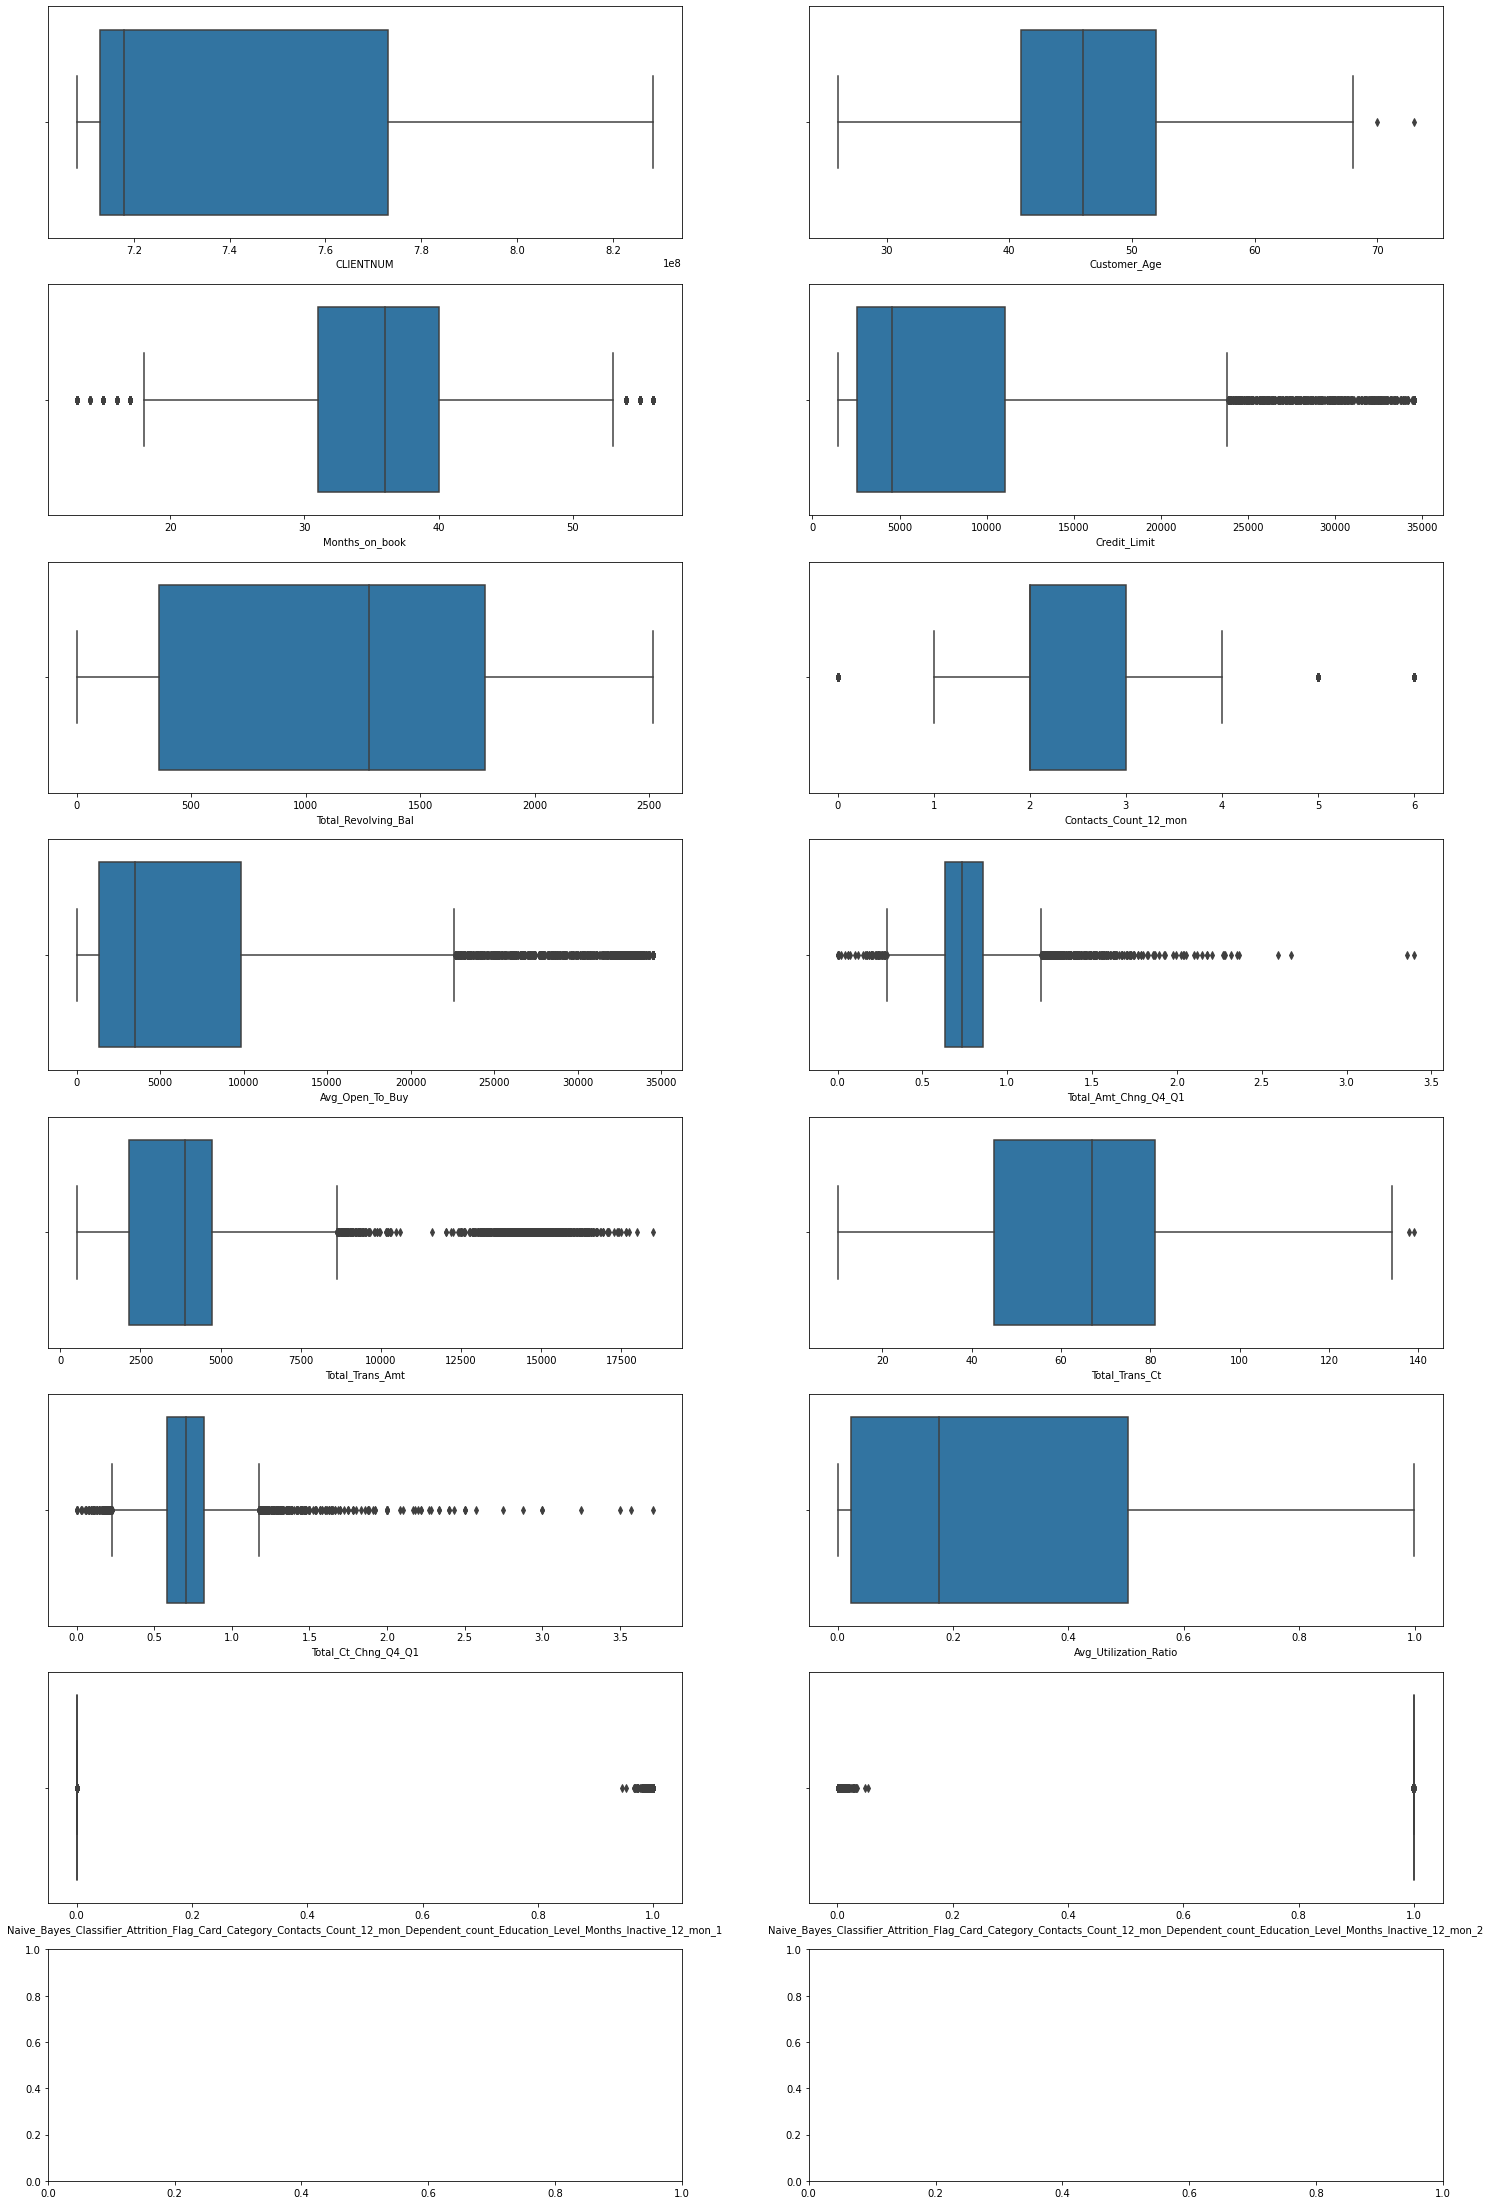

In [10]:
#boxplot, outliers 
fig, axs = plt.subplots(8, 2, figsize=(25, 40))
axes = [item for sublist in axs for item in sublist]
j = 0

for i in numeric_data:
    sns.boxplot(data=df, x=df[i], ax=axes[j])
    j += 1

plt.show()

In [11]:
##remove outliers
print(df.shape)
for i in numeric_data:
    z=np.abs(stats.zscore(df[i]))
    df=df[(z< 3)]
print(df.shape)

(10127, 23)
(9432, 23)


In [12]:
#normalization
columns = df.columns[1:]
df[columns] = df[columns].apply(lambda x: (x-x.min())/(x.max()-x.min())) 
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
5,713061558,1.0,0.409091,1.0,0.4,0.2,0.5,0.25,0.0,0.534884,...,0.077747,0.495431,0.079970,0.972136,0.040796,0.118644,0.604136,0.311311,0.000047,0.999950
10,708790833,1.0,0.363636,1.0,1.0,0.0,0.0,1.0,0.0,0.418605,...,0.160522,0.582837,0.152928,0.550310,0.048772,0.271186,0.481536,0.217217,0.000183,0.999820
14,712396908,1.0,0.704545,0.0,0.4,0.2,0.5,0.0,0.0,0.813953,...,0.030162,0.270163,0.050792,0.828173,0.074816,0.161017,0.430576,0.279279,0.000106,0.999900
19,709327383,1.0,0.431818,0.0,0.4,0.2,0.5,0.0,0.0,0.558140,...,0.393972,0.459674,0.385652,0.654799,0.049195,0.093220,0.650665,0.080080,0.000047,0.999950
20,806165208,1.0,0.477273,1.0,0.2,1.0,1.0,0.5,0.0,0.674419,...,0.590751,0.715137,0.555617,0.608359,0.047149,0.144068,0.665436,0.086086,0.000049,0.999950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10121,713899383,1.0,0.681818,0.0,0.2,0.2,0.0,0.0,0.0,0.860465,...,0.068013,0.240763,0.089213,0.348297,0.994212,0.932203,0.563516,0.164164,0.000141,0.999860
10123,710638233,0.0,0.340909,1.0,0.4,0.6,1.0,0.25,0.0,0.279070,...,0.085819,0.868494,0.060499,0.529412,0.582580,0.500000,0.483752,0.511512,0.995917,0.004085
10124,716506083,0.0,0.409091,0.0,0.2,0.4,0.5,0.0,0.0,0.534884,...,0.120042,0.000000,0.156637,0.541022,0.690359,0.423729,0.583456,0.000000,0.998529,0.001473
10125,717406983,0.0,0.090909,1.0,0.4,0.2,0.0,0.25,0.0,0.534884,...,0.116172,0.000000,0.152928,0.321207,0.556536,0.440678,0.512555,0.000000,0.997358,0.002649


In [13]:
df = df[df.columns]

df.to_csv('BankChurnML.csv')